# Unspervised Machine Learning - Clustering

### Contents:

#### 01. Importing Libraries and Data
#### 02. Using the Elbow Technique
#### 03. K-Means Clustering

## 01. Importing Libraries and Data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans 
import pylab as pl

In [2]:
# Set option to ensure charts are displayed inline in the notebook

%matplotlib inline

In [3]:
# Set option to display max number of columns

pd.set_option('display.max_columns', None)

In [4]:
# Define path for importing the data

path = r'C:\Users\jenci\Documents\Data Analytics\Data Analytics\Advanced Analytics and Dashboard Design\Acheivement 6'

In [5]:
# Import data

df = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'hrrp_hgi_hvbp_1.csv'))

In [6]:
# Check data

df.head(5)

,Facility ID,Facility Name,State,Address,City/Town,ZIP Code,County/Parish,Telephone Number,Hospital Type,Hospital Ownership,Emergency Services,Promotes Interoperability of EHRs,Birthing Friendly Facility,Hospital Overall Rating,Measure Name,Excess Readmission Ratio,Observed Readmission Rate,Expected Readmission Rate,Excess Readmissions Threshold,Count of Facility MORT Measures,MORT Measures Better,MORT Measures Worse,Count of Facility Safety Measures,Safety Measures Better,Safety Measures Worse,Count of Facility READM Measures,READM Measures Better,READM Measures Worse,MORT-30-AMI Benchmark,MORT-30-AMI Performance Rate,AMI Normative Performance Index,AMI Performance Comparison,MORT-30-HF Benchmark,MORT-30-HF Performance Rate,HF Normative Performance Index,HF Performance Comparison,MORT-30-PN Benchmark,MORT-30-PN Performance Rate,PN Normative Performance Index,PN Performance Comparison,MORT-30-COPD Benchmark,MORT-30-COPD Performance Rate,COPD Normative Performance Index,COPD Performance Comparison,Excess Readmission Comparison
0,10001,SOUTHEAST HEALTH MEDICAL CENTER,AL,1108 ROSS CLARK CIRCLE,DOTHAN,36301,HOUSTON,(334) 793-8701,Acute Care Hospitals,Government - Hospital District or Authority,Yes,Y,Y,3,READM-30-HIP-KNEE-HRRP,0.8916,3.5325,3.9618,Below Threshold,7.0,1.0,1.0,8.0,2.0,0.0,11.0,0.0,1.0,0.887868,0.880237,0.991405,Meets or Falls Below Peers,0.907733,0.901917,0.993593,Meets or Falls Below Peers,0.872976,0.815392,0.934037,Meets or Falls Below Peers,0.934002,0.90986,0.974152,Meets or Falls Below Peers,Low Excess Readmissions
1,10001,SOUTHEAST HEALTH MEDICAL CENTER,AL,1108 ROSS CLARK CIRCLE,DOTHAN,36301,HOUSTON,(334) 793-8701,Acute Care Hospitals,Government - Hospital District or Authority,Yes,Y,Y,3,READM-30-HF-HRRP,1.1003,23.1263,21.0184,Above Threshold,7.0,1.0,1.0,8.0,2.0,0.0,11.0,0.0,1.0,0.887868,0.880237,0.991405,Meets or Falls Below Peers,0.907733,0.901917,0.993593,Meets or Falls Below Peers,0.872976,0.815392,0.934037,Meets or Falls Below Peers,0.934002,0.90986,0.974152,Meets or Falls Below Peers,High Excess Readmissions
2,10001,SOUTHEAST HEALTH MEDICAL CENTER,AL,1108 ROSS CLARK CIRCLE,DOTHAN,36301,HOUSTON,(334) 793-8701,Acute Care Hospitals,Government - Hospital District or Authority,Yes,Y,Y,3,READM-30-AMI-HRRP,0.9332,12.9044,13.8283,Below Threshold,7.0,1.0,1.0,8.0,2.0,0.0,11.0,0.0,1.0,0.887868,0.880237,0.991405,Meets or Falls Below Peers,0.907733,0.901917,0.993593,Meets or Falls Below Peers,0.872976,0.815392,0.934037,Meets or Falls Below Peers,0.934002,0.90986,0.974152,Meets or Falls Below Peers,Low Excess Readmissions
3,10001,SOUTHEAST HEALTH MEDICAL CENTER,AL,1108 ROSS CLARK CIRCLE,DOTHAN,36301,HOUSTON,(334) 793-8701,Acute Care Hospitals,Government - Hospital District or Authority,Yes,Y,Y,3,READM-30-PN-HRRP,0.9871,17.0529,17.2762,Below Threshold,7.0,1.0,1.0,8.0,2.0,0.0,11.0,0.0,1.0,0.887868,0.880237,0.991405,Meets or Falls Below Peers,0.907733,0.901917,0.993593,Meets or Falls Below Peers,0.872976,0.815392,0.934037,Meets or Falls Below Peers,0.934002,0.90986,0.974152,Meets or Falls Below Peers,Average Excess Readmissions
4,10001,SOUTHEAST HEALTH MEDICAL CENTER,AL,1108 ROSS CLARK CIRCLE,DOTHAN,36301,HOUSTON,(334) 793-8701,Acute Care Hospitals,Government - Hospital District or Authority,Yes,Y,Y,3,READM-30-CABG-HRRP,0.9517,9.8131,10.3112,Below Threshold,7.0,1.0,1.0,8.0,2.0,0.0,11.0,0.0,1.0,0.887868,0.880237,0.991405,Meets or Falls Below Peers,0.907733,0.901917,0.993593,Meets or Falls Below Peers,0.872976,0.815392,0.934037,Meets or Falls Below Peers,0.934002,0.90986,0.974152,Meets or Falls Below Peers,Average Excess Readmissions


In [7]:
# Check shape

df.shape

(10344, 45)

## 02. Using the Elbow Technique

In [8]:
# Create a subset with only numerical variables to use k-means algorithm

df_sub_numeric = df.select_dtypes(include=['int', 'float'])

In [9]:
# Define the range of potential clusters in the data
num_cl = range(1, 10) 

# Defines k-means clusters in the range assigned above
kmeans = [KMeans(n_clusters=i, n_init=10) for i in num_cl]

In [10]:
# Create a score that represents a rate of variation for the given cluster option
score = [kmeans[i].fit(df_sub_numeric).score(df_sub_numeric) for i in range(len(kmeans))] 

score

[-265070759967974.53,
 -67937892854526.516,
 -37755925173996.55,
 -23953124652218.883,
 -17315135785939.031,
 -13001834605677.562,
 -10543138617223.016,
 -8401027755378.757,
 -6867247568669.562]

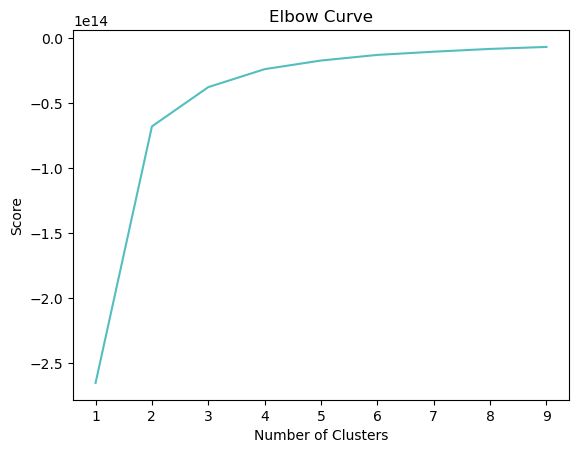

In [11]:
# Plot the elbow curve 

pl.plot(num_cl,score, color='#54bebe')
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

> The elbow curve indicates that as the number of clusters increases, the average distance of data points to their respective cluster centroids decreases.
>
>  It begins to flatten noticeably **at four clusters, suggesting that this is likely the optimal number of clusters for the data.**

## 03. K-Means Clustering

In [18]:
# Create the k-means object

kmeans = KMeans(n_clusters = 4, n_init=10)

In [19]:
# Fit the k-means object to the data

kmeans.fit(df_sub_numeric)

KMeans(n_clusters=4, n_init=10)

In [20]:
# Create new column 'Clusters'

df_sub_numeric['Clusters'] = kmeans.fit_predict(df_sub_numeric)

In [21]:
# Check output

df_sub_numeric.head(5)

,Facility ID,ZIP Code,Hospital Overall Rating,Excess Readmission Ratio,Observed Readmission Rate,Expected Readmission Rate,Count of Facility MORT Measures,MORT Measures Better,MORT Measures Worse,Count of Facility Safety Measures,Safety Measures Better,Safety Measures Worse,Count of Facility READM Measures,READM Measures Better,READM Measures Worse,MORT-30-AMI Benchmark,MORT-30-AMI Performance Rate,AMI Normative Performance Index,MORT-30-HF Benchmark,MORT-30-HF Performance Rate,HF Normative Performance Index,MORT-30-PN Benchmark,MORT-30-PN Performance Rate,PN Normative Performance Index,MORT-30-COPD Benchmark,MORT-30-COPD Performance Rate,COPD Normative Performance Index,Clusters
0,10001,36301,3,0.8916,3.5325,3.9618,7.0,1.0,1.0,8.0,2.0,0.0,11.0,0.0,1.0,0.887868,0.880237,0.991405,0.907733,0.901917,0.993593,0.872976,0.815392,0.934037,0.934002,0.90986,0.974152,3
1,10001,36301,3,1.1003,23.1263,21.0184,7.0,1.0,1.0,8.0,2.0,0.0,11.0,0.0,1.0,0.887868,0.880237,0.991405,0.907733,0.901917,0.993593,0.872976,0.815392,0.934037,0.934002,0.90986,0.974152,3
2,10001,36301,3,0.9332,12.9044,13.8283,7.0,1.0,1.0,8.0,2.0,0.0,11.0,0.0,1.0,0.887868,0.880237,0.991405,0.907733,0.901917,0.993593,0.872976,0.815392,0.934037,0.934002,0.90986,0.974152,3
3,10001,36301,3,0.9871,17.0529,17.2762,7.0,1.0,1.0,8.0,2.0,0.0,11.0,0.0,1.0,0.887868,0.880237,0.991405,0.907733,0.901917,0.993593,0.872976,0.815392,0.934037,0.934002,0.90986,0.974152,3
4,10001,36301,3,0.9517,9.8131,10.3112,7.0,1.0,1.0,8.0,2.0,0.0,11.0,0.0,1.0,0.887868,0.880237,0.991405,0.907733,0.901917,0.993593,0.872976,0.815392,0.934037,0.934002,0.90986,0.974152,3


In [22]:
# Check counts

df_sub_numeric['Clusters'].value_counts()

Clusters
3    2962
0    2689
1    2601
2    2092
Name: count, dtype: int64

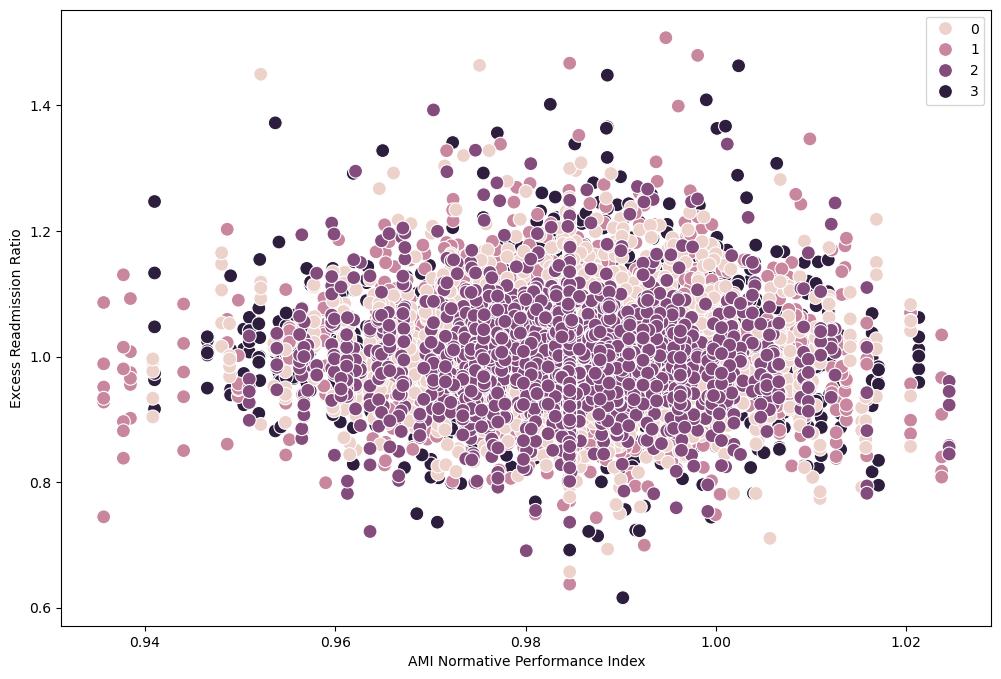

In [23]:
# Plot the clusters for the 'Excess Readmission Ratio' and 'AMI Normative Performance Index' variables

plt.figure(figsize=(12,8))
ami_excess_clust = sns.scatterplot(x=df_sub_numeric['AMI Normative Performance Index'], y=df_sub_numeric['Excess Readmission Ratio'], hue=kmeans.labels_, s=100) 

ami_excess_clust.grid(False)
plt.xlabel('AMI Normative Performance Index')
plt.ylabel('Excess Readmission Ratio')
plt.show()

> The scatter plot shows a dense central cluster of data points around an AMI Normative Performance Index of 0.98 to 1.00 and an Excess Readmission Ratio of 0.9 to 1.1, with colors representing different categories (0, 1, 2, 3). This central clustering indicates that most hospitals or units perform within a normative range on both indices, and the even distribution of colors within this cluster suggests that the categorical variable does not have a strong direct impact on these metrics.
>
> Outliers are spread across different categories, further indicating that the categorical variable may not significantly influence the AMI Normative Performance Index or Excess Readmission Ratio. This lack of distinct clustering by color implies a need for further exploration to understand the factors differentiating these categories. Overall, while the clustering makes sense in terms of general performance distribution, the categorical variable's influence requires additional investigation.


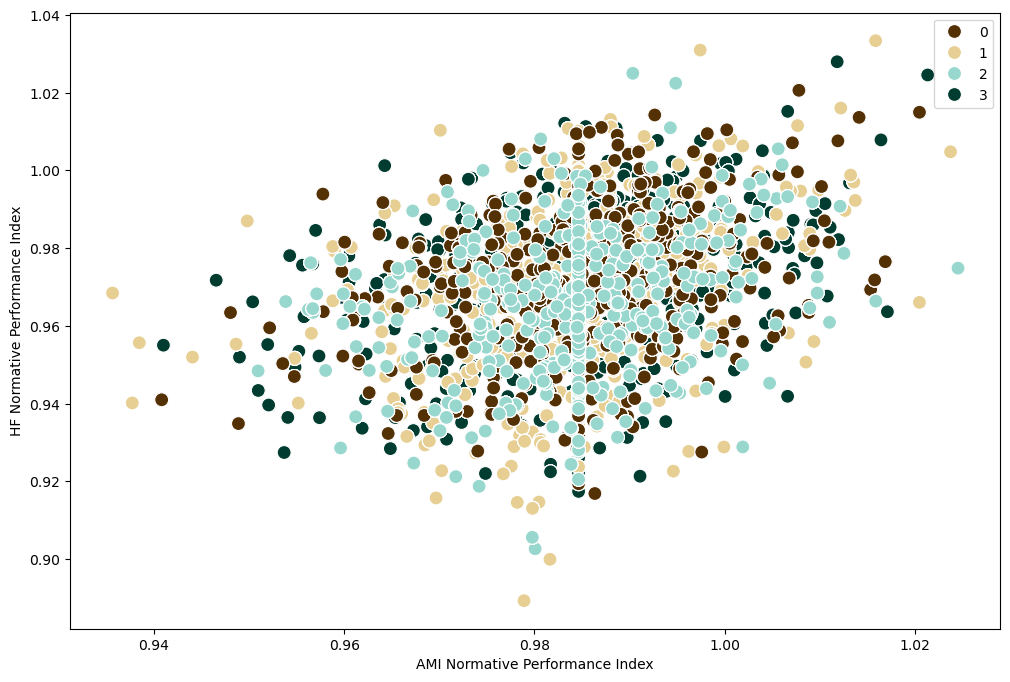

In [24]:
# Plot the clusters for the 'AMI Normative Performance Index' and 'HF Normative Performance Index' variables

plt.figure(figsize=(12,8))
ami_hf_clust = sns.scatterplot(x=df_sub_numeric['AMI Normative Performance Index'], y=df_sub_numeric['HF Normative Performance Index'], hue=kmeans.labels_, palette='BrBG', s=100) 

ami_hf_clust.grid(False)
plt.xlabel('AMI Normative Performance Index')
plt.ylabel('HF Normative Performance Index')
plt.show()

>The clusters in the scatter plot show significant overlap, especially in the dense central region, indicating that many data points share similar values for both HF and AMI Normative Performance Indices. This suggests that the indices are related and measure similar aspects of performance, leading to a natural clustering around a common norm, particularly for Cluster 1 (light blue-green), which appears to represent typical performance. The slight tendencies for Clusters 0 (brown), 2 (beige), and 3 (dark green) to spread out in different directions imply minor variations in performance within this central grouping.
>
>However, the lack of clear boundaries and the significant overlap among clusters indicate that the current clustering may not provide meaningful separation. This suggests that additional features or dimensions might be necessary to distinguish the clusters better. The insights gained from this observation are valuable as they highlight the need for further data exploration and potentially employing more advanced techniques like dimensionality reduction or incorporating more performance indices to achieve clearer cluster separation and a deeper understanding of the underlying data patterns.

In [25]:
# Set names for each cluster
df_sub_numeric.loc[df_sub_numeric['Clusters'] == 0, 'Clusters_1'] = 'dark brown'
df_sub_numeric.loc[df_sub_numeric['Clusters'] == 1, 'Clusters_1'] = 'beige'
df_sub_numeric.loc[df_sub_numeric['Clusters'] == 2, 'Clusters_1'] = 'light blue-green'
df_sub_numeric.loc[df_sub_numeric['Clusters'] == 3, 'Clusters_1'] = 'dark green'

In [26]:
df_sub_numeric['Clusters_1'].value_counts()

Clusters_1
dark green          2962
dark brown          2689
beige               2601
light blue-green    2092
Name: count, dtype: int64

In [27]:
# Calculate descriptive statistics for clusters
df_sub_numeric.groupby('Clusters_1').agg({
    'Hospital Overall Rating': ['mean', 'median'],
    'Excess Readmission Ratio': ['mean', 'median'],
    'MORT Measures Better': ['mean', 'median'],
    'Safety Measures Better': ['mean', 'median'],
    'READM Measures Better': ['mean', 'median'],
    'AMI Normative Performance Index': ['mean', 'median'],
    'HF Normative Performance Index': ['mean', 'median'],
    'PN Normative Performance Index': ['mean', 'median'],
    'COPD Normative Performance Index': ['mean', 'median']
})

Hospital Overall Rating        Excess Readmission Ratio  \
                                    mean median                     mean   
Clusters_1                                                                 
beige                           3.183775    3.0                 1.002812   
dark brown                      3.180364    3.0                 1.004509   
dark green                      3.042876    3.0                 1.006350   
light blue-green                3.381931    3.0                 0.995523   

                          MORT Measures Better        Safety Measures Better  \
                   median                 mean median                   mean   
Clusters_1                                                                     
beige             0.99790             0.258362    0.0               0.986544   
dark brown        0.99870             0.277055    0.0               1.133135   
dark green        1.00115             0.260972    0.0               1.191762   
light blue-green  0.99440             0.123327    0.0               1.123805   

                        READM Measures Better         \
                 median                  mean median   
Clusters_1                                             
beige               1.0              0.421376    0.0   
dark brown          1.0              0.359985    0.0   
dark green          1.0              0.414247    0.0   
light blue-green    1.0              0.493308    0.0   

                 AMI Normative Performance Index            \
                                            mean    median   
Clusters_1                                                   
beige                                   0.984104  0.984643   
dark brown                              0.985100  0.984643   
dark green                              0.985047  0.984643   
light blue-green                        0.984262  0.984643   

                 HF Normative Performance Index            \
                                           mean    median   
Clusters_1                                                  
beige                                  0.968121  0.969090   
dark brown                             0.970778  0.971021   
dark green                             0.971096  0.971651   
light blue-green                       0.966423  0.966270   

                 PN Normative Performance Index            \
                                           mean    median   
Clusters_1                                                  
beige                                  0.931645  0.932101   
dark brown                             0.936150  0.936927   
dark green                             0.934445  0.936125   
light blue-green                       0.932468  0.932630   

                 COPD Normative Performance Index            
                                             mean    median  
Clusters_1                                                   
beige                                    0.969299  0.969864  
dark brown                               0.970578  0.970826  
dark green                               0.968134  0.968834  
light blue-green                         0.966703  0.968834

>**Useful for Future Steps of an Analytics Pipeline**
>
>The overlapping clusters and lack of clear boundaries in our scatter plot tell us that the current features (HF and AMI Normative Performance Indices) might not be enough to clearly separate the data into distinct groups. This means we should look for additional features or data points that could help us better understand the differences between clusters. Next steps could be using more advanced  techniques like PCA (Principal Component Analysis) or t-SNE to reduce the data's dimensions and visualize it in a way that might show clearer groupings.
>
>Even though our clusters overlap, we can still use them to start analyzing specific segments of our data. This targeted analysis might help us find more detailed patterns or insights. Overall, these findings suggest that our analysis is an ongoing process where we continuously refine our methods to get clearer and more useful results.